<a href="https://colab.research.google.com/github/akkipant/CS5542-Big-Data-Analytics-and-Applications/blob/master/ICP-3/Source/BDA_ICP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the important libraries

In [1]:
#Import required libraries :
import pandas as pd

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

## Loading the data from the provided Link

In [2]:
#get the Data used :
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [3]:
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


## Data Cleaning

### Remove @username Handles

In [31]:
Data['cleaned_tweets'] = Data.tweet.str.replace('@[^\s]+', '')  #Remove @<username> from the tweets
Data

,id,label,tweet,cleaned_tweets,no_of_words
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,21
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...,22
2,3,0,bihday your majesty,bihday your majesty,5
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...,17
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,8
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...,6
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,25
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,15
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso...",13


### Remove punctuations

In [5]:
Data.cleaned_tweets = Data.cleaned_tweets.str.replace('[^\w\s]','') #Remove Punctuations (Regex- NonWhitespace NonWord)
Data

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuuðððððððððâï
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso cond...


### Remove numbers

In [6]:
Data.cleaned_tweets = Data.cleaned_tweets.str.replace('[0-9]+', '') #Remove Numbers
Data

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuuðððððððððâï
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso cond...


### Removing NonASCII Characters

In [7]:
Data.cleaned_tweets = Data.cleaned_tweets.str.encode("ascii", "ignore").str.decode("utf-8")  #Remove non ascii character that take multiple byte to store
Data

,id,label,tweet,cleaned_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso cond...


## Data Visualisation

### WordCloud

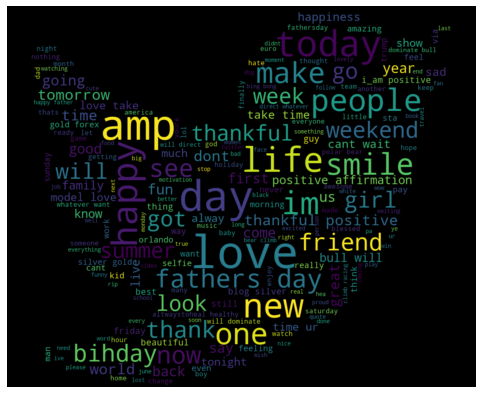

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
all_words = ' '.join([text for text in Data['cleaned_tweets']])
from wordcloud import WordCloud
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, mask=Mask).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

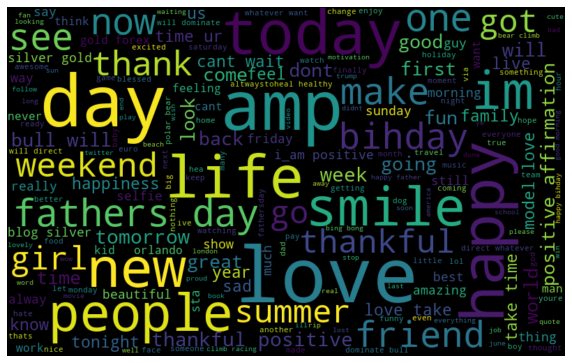

In [9]:
normal_words =' '.join([text for text in Data['cleaned_tweets'][Data['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

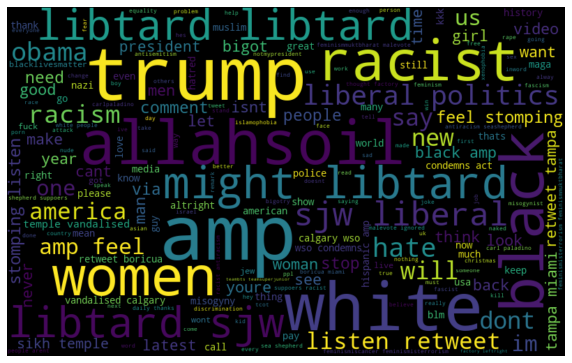

In [10]:
negative_words = ' '.join([text for text in Data['cleaned_tweets'][Data['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Frequency plot of normal tweet and Negative tweet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


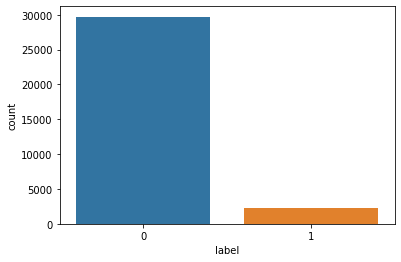

In [11]:
import seaborn as sns

sns.countplot(Data["label"])  #Number of Racist/Sexist tweets vs Normal Tweets

### Numbers of tweets vs Number of words

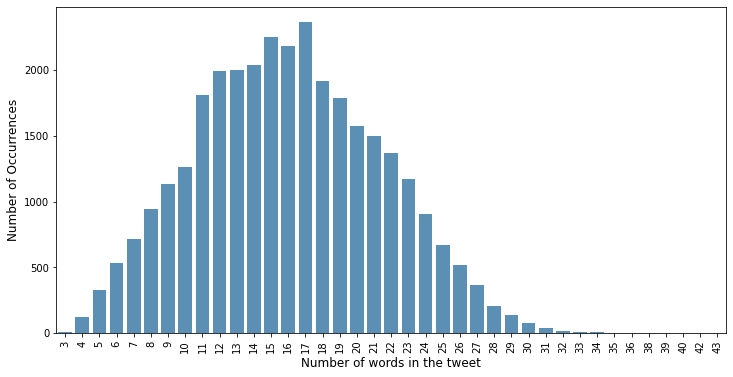

In [12]:
#Plotting number of tweets vs Numbers of words in every tweet (this is for cleaned tweets)

color = sns.color_palette()
Data['no_of_words'] = Data['cleaned_tweets'].apply(lambda x :len(x.split(' ')))
cnt_words=Data['no_of_words'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_words.index, cnt_words.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the tweet', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## Data Processing and Model Training

### Tokenisation and Stemming

In [13]:
from nltk.tokenize import WordPunctTokenizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

tok = WordPunctTokenizer()
lemma = WordNetLemmatizer()
snowball = SnowballStemmer("english")



In [14]:
def tokenandLemmaIt(tweet):
  words = [x for x  in tok.tokenize(tweet) if len(x) > 1]
  stemmed_words = [snowball.stem(word) for word in words]
  return (" ".join( stemmed_words)).strip()
Data['cleaned_tweets'] = Data['tweet'].apply(lambda x: tokenandLemmaIt(x))

In [15]:
Data

,id,label,tweet,cleaned_tweets,no_of_words
0,1,0,@user when a father is dysfunctional and is s...,user when father is dysfunct and is so selfish...,21
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thank for lyft credit can use caus t...,22
2,3,0,bihday your majesty,bihday your majesti,5
3,4,0,#model i love u take with u all the time in ...,model love take with all the time in urð ±!!...,17
4,5,0,factsguide: society now #motivation,factsguid societi now motiv,8
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate user isz that youuu      ...,6
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwav tri to wrap h...,25
31959,31960,0,listening to sad songs on a monday morning otw...,listen to sad song on monday morn otw to work ...,15
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",user sikh templ vandalis in in calgari wso con...,13


In [16]:
Data[Data.tweet.isnull() == True]  #No empty Tweets

,id,label,tweet,cleaned_tweets,no_of_words


In [17]:
Data[Data.label.isnull() == True]  #No empty Label

,id,label,tweet,cleaned_tweets,no_of_words


### Splitting into 80% Training and 20% Testing data

In [18]:
import sklearn.model_selection as ms
train_data, test_data = ms.train_test_split(Data, test_size=0.2, random_state=42, shuffle=True)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.model_selection import GridSearchCV


### Defining Parameters for the TFIDF Vectoriser and Model and then gridSearchCV for HyperParameter Tuning during training

In [32]:
#Linear_svm Model
params = {'tfidf__max_df': [0.9, 0.95],'tfidf__ngram_range': [(1,1), (1,2)], "svc__C": [0.001,.01, .1, 1, 10, 100]}

#Using Pipeline function to vectorise the tweets and then training the support vector classification machine on the vectors
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(sublinear_tf=True, stop_words='english')),
    ("svc", LinearSVC(penalty='l2',dual=False,random_state=0, max_iter=1000,tol=0.01)),
])
#Using GridSearchCV for HyperParameter Tuning
gs = GridSearchCV(pipeline, params, cv=12, verbose=2, n_jobs=-1)

#Training the model on the Cleaned training data
gs.fit(train_data['cleaned_tweets'], train_data['label'])
print(gs.best_estimator_)
print(gs.best_score_)

Fitting 12 folds for each of 24 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  3.2min finished


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 LinearSVC(C=1, class_weight=None, dual=False,
                           fit_intercept=True, intercept_scaling=1,
            

In [21]:
#Predict the Labels for the cleaned test data
predicted = gs.predict(test_data['cleaned_tweets'])

In [24]:
sum = 0
for p, y in zip(test_data.label, predicted):
  if p == y:
    sum = sum + 1
print('Accuracy: ', sum/len(predicted)*100)

Accuracy:  96.41795714062256


###Final Score

In [28]:
from sklearn.metrics import f1_score, accuracy_score
#Printing the F1 Score and the Accuracy score
print('F1 Score : ', f1_score(test_data.label, predicted))
print('Accuracy : ',  accuracy_score(test_data.label, predicted))

F1 Score :  0.7090216010165185
Accuracy :  0.9641795714062256
